<a href="https://colab.research.google.com/github/FishStalkers/deeplabcut-script/blob/main/fishstalkers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.cluster import KMeans, DBSCAN, Birch
from sklearn.mixture import GaussianMixture

In [ ]:
df = pd.read_csv("CollectedData_annie.csv", header=[0,1,2,3], index_col=0, skiprows=1)
df = df.drop(columns=['lefteye', 'righteye'], level=1)
nose = df['fish1', 'nose'].to_numpy()
spine1 = df['fish1', 'spine1'].to_numpy()
len = np.linalg.norm(nose - spine1, axis = 1)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:2854: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


In [ ]:
body_lengths = None
body_widths = None
l_divw=[]
count=[]
counter=0
for n in range(1, 6):
  curr_fish = 'fish' + str(n)
  nose = df[curr_fish, 'nose'].to_numpy()
  spine1 = df[curr_fish, 'spine1'].to_numpy()
  spine2 = df[curr_fish, 'spine2'].to_numpy()
  spine3 = df[curr_fish, 'spine3'].to_numpy()
  backfin = df[curr_fish, 'backfin'].to_numpy()
  leftfin = df[curr_fish, 'leftfin'].to_numpy()
  rightfin = df[curr_fish, 'rightfin'].to_numpy()
  bodylength = np.linalg.norm(nose - spine1, axis = 1) + np.linalg.norm(spine1 - spine2, axis = 1) + np.linalg.norm(spine2 - spine3, axis = 1) + np.linalg.norm(spine3 - backfin, axis = 1)
  bodywidth = np.linalg.norm(leftfin - spine2, axis = 1) + np.linalg.norm(spine2 - rightfin, axis = 1)
  ldivw=bodylength/bodywidth
  l_divw.append(ldivw)
  count.append(counter)
  counter+=1
  if (body_lengths is None):
    body_lengths = bodylength
  else:
    body_lengths = np.vstack((body_lengths, bodylength))
  if (body_widths is None):
    body_widths = bodywidth
  else:
    body_widths = np.vstack((body_widths, bodywidth))


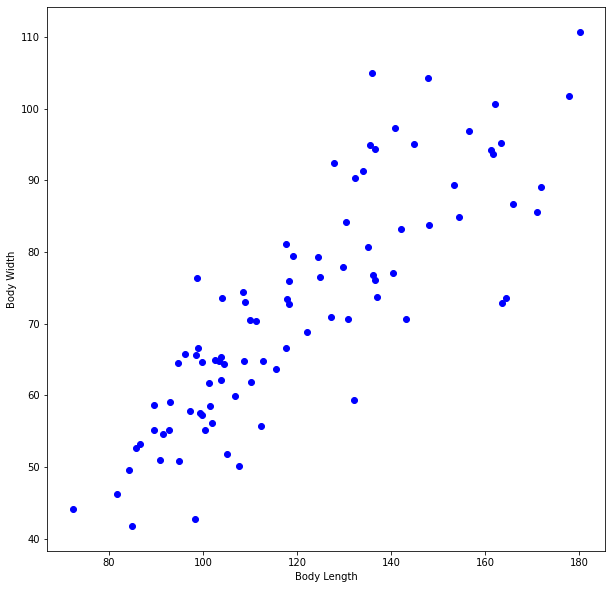

In [ ]:
flatten_length = body_lengths.flatten()
flatten_width = body_widths.flatten()
graph_mask = (np.logical_and(np.logical_not(np.isnan(flatten_length)), np.logical_not(np.isnan(flatten_width))))
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.scatter(flatten_length[graph_mask], flatten_width[graph_mask], c='b')
plt.xlabel("Body Length")
plt.ylabel("Body Width")
plt.show()

In [ ]:
l_divw


[array([1.54175784, 1.48703047, 1.46098505, 1.59002978, 1.71476094,
        1.63741317, 1.81901001, 1.67374045, 1.46760249, 1.86438968,
               nan, 1.62587148, 1.74221282, 1.62645663, 2.03203323,
        1.69850918, 1.78391508, 1.59573028, 1.71910281, 1.58027444,
        1.62379241, 1.76500389, 1.72434313, 1.78036298,        nan,
        1.66831893, 1.50182457, 2.29630834, 1.82107628, 1.62626771,
        1.64205314, 1.57532784, 1.78233498, 1.29265565, 1.76787223,
        1.41227939, 1.450471  , 1.73638365, 1.81358094, 2.01685771,
        1.49167396, 1.66571264, 1.45804408, 1.29553815, 1.74860062,
        1.7952944 ,        nan, 1.55851443, 1.44841913]),
 array([       nan,        nan,        nan, 1.58230951, 2.22586751,
               nan,        nan,        nan, 2.03054852, 1.44665269,
               nan, 1.57143081,        nan, 1.91318473, 2.23634184,
               nan, 1.67488886,        nan, 1.67798496,        nan,
        1.61688968,        nan, 1.68201424, 2.00092652,   

ValueError: ignored

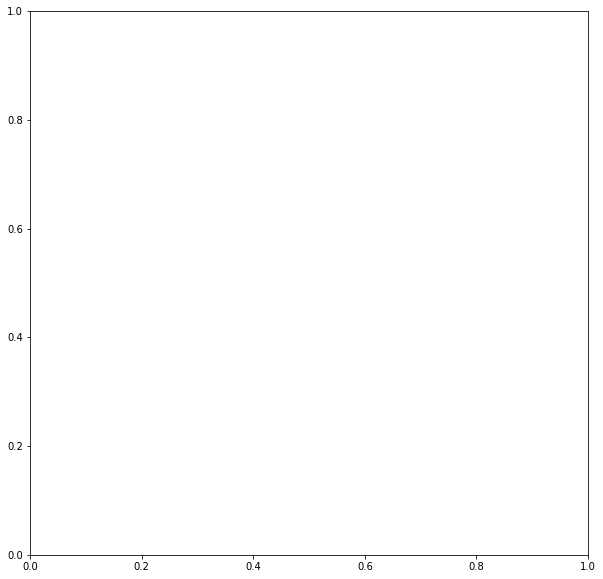

In [ ]:
flatten_length = body_lengths.flatten()
flatten_width = body_widths.flatten()
graph_mask = (np.logical_and(np.logical_not(np.isnan(flatten_length)), np.logical_not(np.isnan(flatten_width))))
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.scatter(count, l_divw, c='b')
plt.xlabel("Body Length")
plt.ylabel("Body Width")
plt.show()
len(count)

In [ ]:
#KMeans clustering - v2
body_length_width_sorted = np.vstack([flatten_length[graph_mask], flatten_width[graph_mask]])
body_length_width_sorted.sort
print(body_length_width_sorted)
'''
body_length_sorted = sorted()
body_width_sorted = sorted()
Y = np.squeeze(np.dstack((body_length_sorted[0:30], body_width_sorted[0:30])))
kmeans = KMeans(n_clusters=5, random_state=0).fit(Y)
labels = kmeans.labels_
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.scatter(Y[:, 0], Y[:, 1], c=labels, cmap=cm.jet)
plt.xlabel("Body Length")
plt.ylabel("Body Width")
plt.show()
'''

[[ 99.71987088  98.98316633  96.12532074 103.88657937 163.31945584
   72.27174835 100.37286923  91.45798694  94.67283099  94.80695652
   86.52203738  99.77650758  89.67077377  84.87574325  84.21856171
   90.97055481 103.347381   153.4847927  102.54841042 104.49450964
   81.72322224  99.3242489  110.25560004 103.77112795  98.52214066
   98.34141886 140.40064331 118.3377027  101.3856989   93.06609338
  106.73725204  98.64791078 117.73917443 103.99066928 117.72662437
  101.53920652 115.54460249 112.28145816 108.9463219  129.83104607
  108.53587978 135.89623842 177.78980907 136.59910992 118.40473038
  140.86959973 111.38231151 132.14526554 105.19488322 136.53636931
  124.5099931  165.86780992 164.5278176  135.20254055 108.65913851
  156.51286359  92.80203415 171.09812054 136.24999489 143.17250059
  124.86421932 180.16696652 135.44012473 163.56609791 132.33733222
  122.14313353 171.93691032  85.69381461 130.89517328 147.91751848
  127.27812584 110.07554741 119.17385054 130.39854124 112.7297

'\nbody_length_sorted = sorted()\nbody_width_sorted = sorted()\nY = np.squeeze(np.dstack((body_length_sorted[0:30], body_width_sorted[0:30])))\nkmeans = KMeans(n_clusters=5, random_state=0).fit(Y)\nlabels = kmeans.labels_\nf = plt.figure()\nf.set_figwidth(10)\nf.set_figheight(10)\nplt.scatter(Y[:, 0], Y[:, 1], c=labels, cmap=cm.jet)\nplt.xlabel("Body Length")\nplt.ylabel("Body Width")\nplt.show()\n'

In [ ]:
#KMeans clustering for ratios
X = np.squeeze(np.dstack((flatten_length[graph_mask], flatten_width[graph_mask])))
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
labels = kmeans.labels_
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cm.jet)
plt.xlabel("Body Length")
plt.ylabel("Body Width")
plt.show()

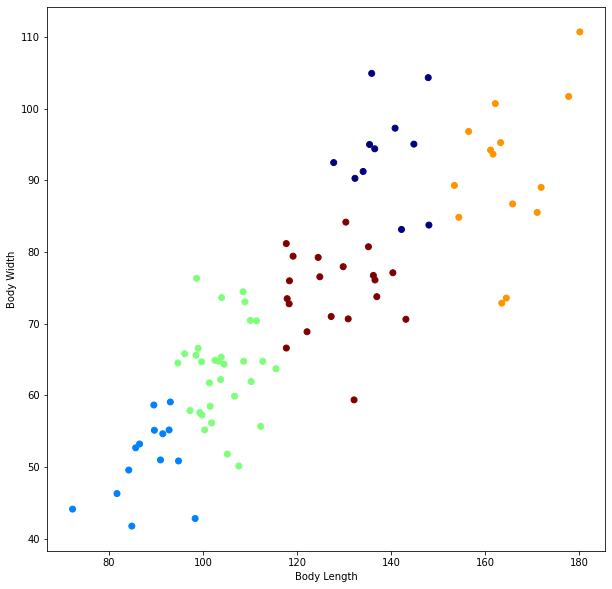

In [ ]:
#KMeans clustering
X = np.squeeze(np.dstack((flatten_length[graph_mask], flatten_width[graph_mask])))
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
labels = kmeans.labels_
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cm.jet)
plt.xlabel("Body Length")
plt.ylabel("Body Width")
plt.show()

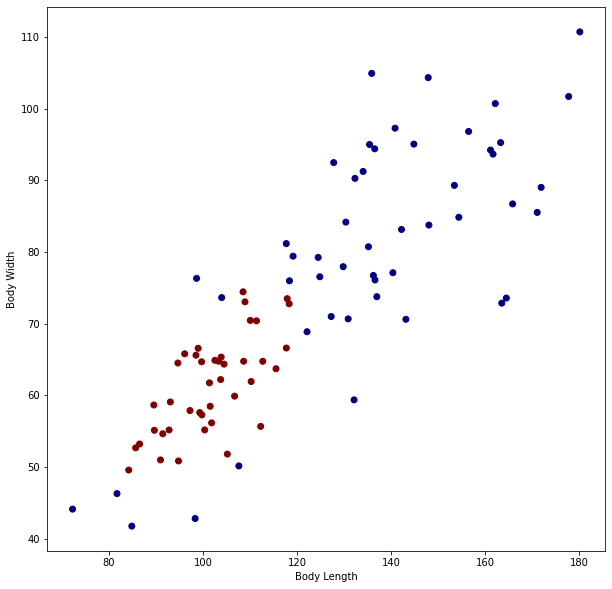

In [ ]:
#DBSCAN clustering
db = DBSCAN(eps=8, min_samples=10).fit(X)
labels = db.labels_
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cm.jet)
plt.xlabel("Body Length")
plt.ylabel("Body Width")
plt.show()

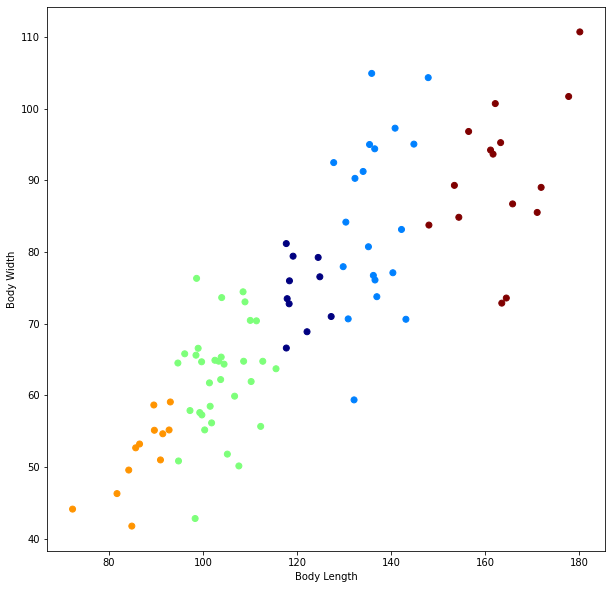

In [ ]:
#GMM
gm = GaussianMixture(n_components=5, random_state=0).fit_predict(X)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.scatter(X[:, 0], X[:, 1], c=gm, cmap=cm.jet)
plt.xlabel("Body Length")
plt.ylabel("Body Width")
plt.show()

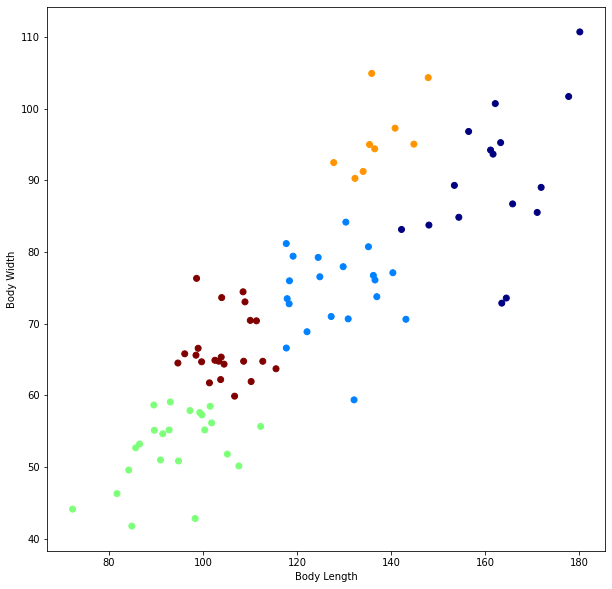

In [ ]:
#Birch
brc = Birch(n_clusters=5)
labels = brc.fit_predict(X)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cm.jet)
plt.xlabel("Body Length")
plt.ylabel("Body Width")
plt.show()